In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # 画图模块
import scipy.stats as stats #统计函数库
from datetime import datetime # 导入时间模块
from IPython.core.interactiveshell import InteractiveShell #设置显示结果
import statsmodels.formula.api as smf  # OLS regression

#显示每一个运行结果
InteractiveShell.ast_node_interactivity = 'all'

# 进行数据准备

In [2]:
reg_data = pd.read_csv('D:/my_pra_data/stock/reg_.csv')
reg_data = reg_data.rename(columns = {'month': 'YearMon'})
reg_data['YearMon'] = pd.to_datetime(reg_data['YearMon'], format = '%Y-%m-%d')
reg_data

,YearMon,pd,pb,pe
0,1995-01-01,4.084782,0.821406,2.763315
1,1995-02-01,4.081370,0.801429,2.741896
2,1995-03-01,4.238190,0.912102,2.844483
3,1995-04-01,4.117053,0.761376,2.618815
4,1995-05-01,4.137976,0.772707,2.762227
...,...,...,...,...
313,2021-02-01,4.140173,0.542445,2.922587
314,2021-03-01,4.117256,0.519381,2.873956
315,2021-04-01,4.114410,0.513151,2.787560
316,2021-05-01,4.174426,0.514720,2.838756


In [3]:
reg_data_mon = reg_data[['YearMon','pd']]
reg_data_mon.set_index('YearMon', inplace = True)
reg_data_mon.loc[:,'year'] = reg_data_mon.index.year
reg_data_mon.loc[:,'month'] = reg_data_mon.index.month
reg_data_mon = reg_data_mon[['year', 'month', 'pd']]
reg_data_mon = reg_data_mon.dropna()
reg_data_mon

C:\Users\西里\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\西里\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,year,month,pd
YearMon,,,
1995-01-01,1995,1,4.084782
1995-02-01,1995,2,4.081370
1995-03-01,1995,3,4.238190
1995-04-01,1995,4,4.117053
1995-05-01,1995,5,4.137976
...,...,...,...
2021-02-01,2021,2,4.140173
2021-03-01,2021,3,4.117256
2021-04-01,2021,4,4.114410


In [4]:
market_return_mon = pd.read_table('D:/my_pra_data/stock/market_return_mon.csv',sep=',')
market_return_mon

,year,month,Return
0,1991,1,0.029998
1,1991,2,0.010203
2,1991,3,-0.099663
3,1991,4,-0.079652
4,1991,5,-0.074521
...,...,...,...
363,2021,4,0.014812
364,2021,5,0.049441
365,2021,6,0.005010
366,2021,7,-0.041398


In [5]:
time_series = pd.merge(market_return_mon,reg_data_mon, on=['year', 'month'])
time_series = time_series.sort_values(axis=0, ascending=True, by=['year', 'month'])
time_series['mon'] = pd.date_range('1995-01-01', '2021-06-01', freq='MS')
time_series.set_index('mon', inplace=True)
time_series

,year,month,Return,pd
mon,,,,
1995-01-01,1995,1,-0.116298,4.084782
1995-02-01,1995,2,-0.014059,4.081370
1995-03-01,1995,3,0.130882,4.238190
1995-04-01,1995,4,-0.104304,4.117053
1995-05-01,1995,5,0.175455,4.137976
...,...,...,...,...
2021-02-01,2021,2,0.003571,4.140173
2021-03-01,2021,3,-0.024019,4.117256
2021-04-01,2021,4,0.014812,4.114410


In [6]:
import os
time_series.to_csv('D:/my_pra_data/stock/time_series_pd_1995_2021.csv',index = False)
print(os.listdir('D:/my_pra_data/stock'))

['1995-2021中国股市月度回报率.png', '2001-2021股市回报率与国债收益率与实际利率.png', '2002-2021股市回报率与CPI与真实利率.png', '3333pb.png', '3333pd.png', '3333pe.png', '6666pb.png', '6666pd.png', '6666pe.png', '95-21 pb-qua.png', '95-21 pd-qua.png', '95-21 pe-qua.png', '95-21pd-qua.png', 'BND_TreasYield.csv', 'BND_TreasYield[DES][csv].txt', 'CME_Mconsumerpriceratio.csv', 'CME_Mconsumerpriceratio[DES][csv].txt', 'figure1.png', 'figure2.png', 'figure3.png', 'market_return_mon.csv', 'reg.csv', 'reg_.csv', 'time_series_1995_2021.csv', 'time_series_pb_1995_2021.csv', 'time_series_pd_1995_2021.csv', 'time_series_pe_1995_2021.csv', 'TRD_Cnmont.csv', 'TRD_Cnmont[DES].txt', 'try - Class 3.pdf', '__MACOSX']


In [7]:
reg_pb_mon = reg_data[['YearMon','pb']]
reg_pb_mon.set_index('YearMon', inplace = True)
reg_pb_mon.loc[:,'year'] = reg_pb_mon.index.year
reg_pb_mon.loc[:,'month'] = reg_pb_mon.index.month
reg_pb_mon = reg_pb_mon[['year', 'month', 'pb']]
reg_pb_mon = reg_pb_mon.dropna()
reg_pb_mon

C:\Users\西里\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\西里\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,year,month,pb
YearMon,,,
1995-01-01,1995,1,0.821406
1995-02-01,1995,2,0.801429
1995-03-01,1995,3,0.912102
1995-04-01,1995,4,0.761376
1995-05-01,1995,5,0.772707
...,...,...,...
2021-02-01,2021,2,0.542445
2021-03-01,2021,3,0.519381
2021-04-01,2021,4,0.513151


In [8]:
time_series_pb = pd.merge(market_return_mon,reg_pb_mon, on=['year', 'month'])
time_series_pb = time_series_pb.sort_values(axis=0, ascending=True, by=['year', 'month'])
time_series_pb['mon'] = pd.date_range('1995-01-01', '2021-06-01', freq='MS')
time_series_pb.set_index('mon', inplace=True)
time_series_pb

,year,month,Return,pb
mon,,,,
1995-01-01,1995,1,-0.116298,0.821406
1995-02-01,1995,2,-0.014059,0.801429
1995-03-01,1995,3,0.130882,0.912102
1995-04-01,1995,4,-0.104304,0.761376
1995-05-01,1995,5,0.175455,0.772707
...,...,...,...,...
2021-02-01,2021,2,0.003571,0.542445
2021-03-01,2021,3,-0.024019,0.519381
2021-04-01,2021,4,0.014812,0.513151


In [9]:
import os
time_series_pb.to_csv('D:/my_pra_data/stock/time_series_pb_1995_2021.csv',index = False)
print(os.listdir('D:/my_pra_data/stock'))

['1995-2021中国股市月度回报率.png', '2001-2021股市回报率与国债收益率与实际利率.png', '2002-2021股市回报率与CPI与真实利率.png', '3333pb.png', '3333pd.png', '3333pe.png', '6666pb.png', '6666pd.png', '6666pe.png', '95-21 pb-qua.png', '95-21 pd-qua.png', '95-21 pe-qua.png', '95-21pd-qua.png', 'BND_TreasYield.csv', 'BND_TreasYield[DES][csv].txt', 'CME_Mconsumerpriceratio.csv', 'CME_Mconsumerpriceratio[DES][csv].txt', 'figure1.png', 'figure2.png', 'figure3.png', 'market_return_mon.csv', 'reg.csv', 'reg_.csv', 'time_series_1995_2021.csv', 'time_series_pb_1995_2021.csv', 'time_series_pd_1995_2021.csv', 'time_series_pe_1995_2021.csv', 'TRD_Cnmont.csv', 'TRD_Cnmont[DES].txt', 'try - Class 3.pdf', '__MACOSX']


In [10]:
reg_pe_mon = reg_data[['YearMon','pe']]
reg_pe_mon.set_index('YearMon', inplace = True)
reg_pe_mon.loc[:,'year'] = reg_pe_mon.index.year
reg_pe_mon.loc[:,'month'] = reg_pe_mon.index.month
reg_pe_mon = reg_pe_mon[['year', 'month', 'pe']]
reg_pe_mon = reg_pe_mon.dropna()
reg_pe_mon

C:\Users\西里\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\西里\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,year,month,pe
YearMon,,,
1995-01-01,1995,1,2.763315
1995-02-01,1995,2,2.741896
1995-03-01,1995,3,2.844483
1995-04-01,1995,4,2.618815
1995-05-01,1995,5,2.762227
...,...,...,...
2021-02-01,2021,2,2.922587
2021-03-01,2021,3,2.873956
2021-04-01,2021,4,2.787560


In [11]:
time_series_pe = pd.merge(market_return_mon,reg_pe_mon, on=['year', 'month'])
time_series_pe = time_series_pe.sort_values(axis=0, ascending=True, by=['year', 'month'])
time_series_pe['mon'] = pd.date_range('1995-01-01', '2021-06-01', freq='MS')
time_series_pe.set_index('mon', inplace=True)
time_series_pe

,year,month,Return,pe
mon,,,,
1995-01-01,1995,1,-0.116298,2.763315
1995-02-01,1995,2,-0.014059,2.741896
1995-03-01,1995,3,0.130882,2.844483
1995-04-01,1995,4,-0.104304,2.618815
1995-05-01,1995,5,0.175455,2.762227
...,...,...,...,...
2021-02-01,2021,2,0.003571,2.922587
2021-03-01,2021,3,-0.024019,2.873956
2021-04-01,2021,4,0.014812,2.787560


In [12]:
import os
time_series_pe.to_csv('D:/my_pra_data/stock/time_series_pe_1995_2021.csv',index = False)
print(os.listdir('D:/my_pra_data/stock'))

['1995-2021中国股市月度回报率.png', '2001-2021股市回报率与国债收益率与实际利率.png', '2002-2021股市回报率与CPI与真实利率.png', '3333pb.png', '3333pd.png', '3333pe.png', '6666pb.png', '6666pd.png', '6666pe.png', '95-21 pb-qua.png', '95-21 pd-qua.png', '95-21 pe-qua.png', '95-21pd-qua.png', 'BND_TreasYield.csv', 'BND_TreasYield[DES][csv].txt', 'CME_Mconsumerpriceratio.csv', 'CME_Mconsumerpriceratio[DES][csv].txt', 'figure1.png', 'figure2.png', 'figure3.png', 'market_return_mon.csv', 'reg.csv', 'reg_.csv', 'time_series_1995_2021.csv', 'time_series_pb_1995_2021.csv', 'time_series_pd_1995_2021.csv', 'time_series_pe_1995_2021.csv', 'TRD_Cnmont.csv', 'TRD_Cnmont[DES].txt', 'try - Class 3.pdf', '__MACOSX']


# 股票收益率与pd/pb/pe的OLS Regression

In [13]:
time_series['ma_return'] = 1
time_series

,year,month,Return,pd,ma_return
mon,,,,,
1995-01-01,1995,1,-0.116298,4.084782,1
1995-02-01,1995,2,-0.014059,4.081370,1
1995-03-01,1995,3,0.130882,4.238190,1
1995-04-01,1995,4,-0.104304,4.117053,1
1995-05-01,1995,5,0.175455,4.137976,1
...,...,...,...,...,...
2021-02-01,2021,2,0.003571,4.140173,1
2021-03-01,2021,3,-0.024019,4.117256,1
2021-04-01,2021,4,0.014812,4.114410,1


In [14]:
for ti in range(1,61):
    time_series['ma_return'] = time_series['ma_return']*(1+time_series['Return'].shift(-ti))
    model1 = smf.ols('ma_return ~ pd',
                     data=time_series).fit(cov_type='HAC', cov_kwds={'maxlags': 6})
    print()
    print("pd回归结果：前t+",ti,"项复利")
    print(model1.summary())


pd回归结果：前t+ 1 项复利
                            OLS Regression Results                            
Dep. Variable:              ma_return   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.317
Date:                Wed, 06 Oct 2021   Prob (F-statistic):              0.252
Time:                        22:27:08   Log-Likelihood:                 333.35
No. Observations:                 317   AIC:                            -662.7
Df Residuals:                     315   BIC:                            -655.2
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0525      0.034  

                            OLS Regression Results                            
Dep. Variable:              ma_return   R-squared:                       0.115
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     11.12
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           0.000958
Time:                        22:27:08   Log-Likelihood:                -232.38
No. Observations:                 306   AIC:                             468.8
Df Residuals:                     304   BIC:                             476.2
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6000      0.460      5.649      0.0


pd回归结果：前t+ 26 项复利
                            OLS Regression Results                            
Dep. Variable:              ma_return   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     9.349
Date:                Wed, 06 Oct 2021   Prob (F-statistic):            0.00244
Time:                        22:27:08   Log-Likelihood:                -395.68
No. Observations:                 292   AIC:                             795.4
Df Residuals:                     290   BIC:                             802.7
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4596      1.092 


pd回归结果：前t+ 42 项复利
                            OLS Regression Results                            
Dep. Variable:              ma_return   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.195
Method:                 Least Squares   F-statistic:                     19.51
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           1.44e-05
Time:                        22:27:08   Log-Likelihood:                -344.41
No. Observations:                 276   AIC:                             692.8
Df Residuals:                     274   BIC:                             700.1
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7607      0.775 


pd回归结果：前t+ 56 项复利
                            OLS Regression Results                            
Dep. Variable:              ma_return   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     18.78
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           2.10e-05
Time:                        22:27:08   Log-Likelihood:                -364.70
No. Observations:                 262   AIC:                             733.4
Df Residuals:                     260   BIC:                             740.5
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.3955      1.162 

In [15]:
time_series_pb['ma_return'] = 1
time_series_pb

,year,month,Return,pb,ma_return
mon,,,,,
1995-01-01,1995,1,-0.116298,0.821406,1
1995-02-01,1995,2,-0.014059,0.801429,1
1995-03-01,1995,3,0.130882,0.912102,1
1995-04-01,1995,4,-0.104304,0.761376,1
1995-05-01,1995,5,0.175455,0.772707,1
...,...,...,...,...,...
2021-02-01,2021,2,0.003571,0.542445,1
2021-03-01,2021,3,-0.024019,0.519381,1
2021-04-01,2021,4,0.014812,0.513151,1


In [16]:
for ti in range(1,61):
    time_series_pb['ma_return'] = time_series_pb['ma_return']*(1+time_series_pb['Return'].shift(-ti))
    model1 = smf.ols('ma_return ~ pb',
                     data=time_series_pb).fit(cov_type='HAC', cov_kwds={'maxlags': 6})
    print()
    print("pb回归结果：前t+",ti,"项复利")
    print(model1.summary())


pb回归结果：前t+ 1 项复利
                            OLS Regression Results                            
Dep. Variable:              ma_return   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.239
Date:                Wed, 06 Oct 2021   Prob (F-statistic):              0.266
Time:                        22:27:10   Log-Likelihood:                 333.39
No. Observations:                 317   AIC:                            -662.8
Df Residuals:                     315   BIC:                            -655.3
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0239      0.010  


pb回归结果：前t+ 15 项复利
                            OLS Regression Results                            
Dep. Variable:              ma_return   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     11.36
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           0.000848
Time:                        22:27:10   Log-Likelihood:                -288.07
No. Observations:                 303   AIC:                             580.1
Df Residuals:                     301   BIC:                             587.6
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7817      0.226 


pb回归结果：前t+ 29 项复利
                            OLS Regression Results                            
Dep. Variable:              ma_return   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.177
Method:                 Least Squares   F-statistic:                     9.443
Date:                Wed, 06 Oct 2021   Prob (F-statistic):            0.00232
Time:                        22:27:10   Log-Likelihood:                -387.83
No. Observations:                 289   AIC:                             779.7
Df Residuals:                     287   BIC:                             787.0
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4248      0.426 


pb回归结果：前t+ 42 项复利
                            OLS Regression Results                            
Dep. Variable:              ma_return   R-squared:                       0.221
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     21.75
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           4.85e-06
Time:                        22:27:10   Log-Likelihood:                -340.42
No. Observations:                 276   AIC:                             684.8
Df Residuals:                     274   BIC:                             692.1
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6070      0.300 


pb回归结果：前t+ 58 项复利
                            OLS Regression Results                            
Dep. Variable:              ma_return   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     21.82
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           4.82e-06
Time:                        22:27:11   Log-Likelihood:                -365.59
No. Observations:                 260   AIC:                             735.2
Df Residuals:                     258   BIC:                             742.3
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3023      0.434 

In [17]:
time_series_pe['ma_return'] = 1
time_series_pe

,year,month,Return,pe,ma_return
mon,,,,,
1995-01-01,1995,1,-0.116298,2.763315,1
1995-02-01,1995,2,-0.014059,2.741896,1
1995-03-01,1995,3,0.130882,2.844483,1
1995-04-01,1995,4,-0.104304,2.618815,1
1995-05-01,1995,5,0.175455,2.762227,1
...,...,...,...,...,...
2021-02-01,2021,2,0.003571,2.922587,1
2021-03-01,2021,3,-0.024019,2.873956,1
2021-04-01,2021,4,0.014812,2.787560,1


In [18]:
for ti in range(1,61):
    time_series_pe['ma_return'] = time_series_pe['ma_return']*(1+time_series_pe['Return'].shift(-ti))
    model1 = smf.ols('ma_return ~ pe',
                     data=time_series_pe).fit(cov_type='HAC', cov_kwds={'maxlags': 6})
    print()
    print("pe回归结果：前t+",ti,"项复利")
    print(model1.summary())


pe回归结果：前t+ 1 项复利
                            OLS Regression Results                            
Dep. Variable:              ma_return   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                     1.157
Date:                Wed, 06 Oct 2021   Prob (F-statistic):              0.283
Time:                        22:27:12   Log-Likelihood:                 333.20
No. Observations:                 317   AIC:                            -662.4
Df Residuals:                     315   BIC:                            -654.9
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0393      0.024  


pe回归结果：前t+ 14 项复利
                            OLS Regression Results                            
Dep. Variable:              ma_return   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     8.507
Date:                Wed, 06 Oct 2021   Prob (F-statistic):            0.00380
Time:                        22:27:12   Log-Likelihood:                -280.53
No. Observations:                 304   AIC:                             565.1
Df Residuals:                     302   BIC:                             572.5
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2842      0.402 

pe回归结果：前t+ 27 项复利
                            OLS Regression Results                            
Dep. Variable:              ma_return   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     6.210
Date:                Wed, 06 Oct 2021   Prob (F-statistic):             0.0133
Time:                        22:27:12   Log-Likelihood:                -404.68
No. Observations:                 291   AIC:                             813.4
Df Residuals:                     289   BIC:                             820.7
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3513      0.873  


pe回归结果：前t+ 41 项复利
                            OLS Regression Results                            
Dep. Variable:              ma_return   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     5.681
Date:                Wed, 06 Oct 2021   Prob (F-statistic):             0.0178
Time:                        22:27:12   Log-Likelihood:                -361.55
No. Observations:                 277   AIC:                             727.1
Df Residuals:                     275   BIC:                             734.4
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1700      0.710 


pe回归结果：前t+ 54 项复利
                            OLS Regression Results                            
Dep. Variable:              ma_return   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     5.247
Date:                Wed, 06 Oct 2021   Prob (F-statistic):             0.0228
Time:                        22:27:12   Log-Likelihood:                -393.43
No. Observations:                 264   AIC:                             790.9
Df Residuals:                     262   BIC:                             798.0
Df Model:                           1                                         
Covariance Type:                  HAC                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8570      0.973 

# 预测一个月

In [19]:
time_series['lreturn'] =1+time_series['Return'].shift(-1)
time_series['freturn'] =time_series['pd'] * -0.0089+1.0525
time_series

,year,month,Return,pd,ma_return,lreturn,freturn
mon,,,,,,,
1995-01-01,1995,1,-0.116298,4.084782,3.845414,0.985941,1.016145
1995-02-01,1995,2,-0.014059,4.081370,4.376171,1.130882,1.016176
1995-03-01,1995,3,0.130882,4.238190,4.086114,0.895696,1.014780
1995-04-01,1995,4,-0.104304,4.117053,4.621312,1.175455,1.015858
1995-05-01,1995,5,0.175455,4.137976,4.040376,0.913978,1.015672
...,...,...,...,...,...,...,...
2021-02-01,2021,2,0.003571,4.140173,NaN,0.975981,1.015652
2021-03-01,2021,3,-0.024019,4.117256,NaN,1.014812,1.015856
2021-04-01,2021,4,0.014812,4.114410,NaN,1.049441,1.015882


Text(0.5, 0, 'month')

Text(0, 0.5, 'Real')

Text(0.5, 1.0, '1995——2021 one-month pd')

Text(0, 0.5, 'Forecast')

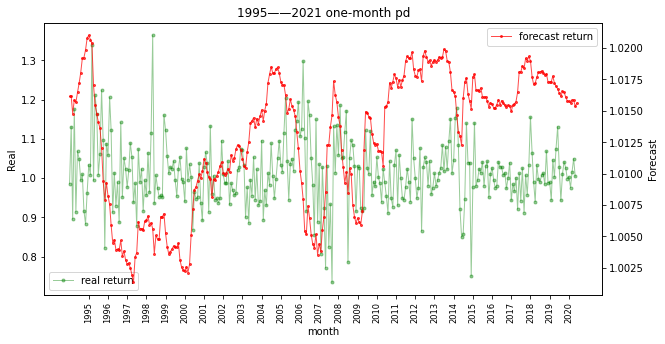

In [20]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(time_series['lreturn'],
         color='green',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='real return')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('Real')  # 设置左边纵坐标标签
ax1.legend(loc=3)  # 设置图例在左下方
ax1.set_title('1995——2021 one-month pd')  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(time_series['freturn'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='forecast return')
ax2.set_ylabel('Forecast')  # 设置右边纵坐标标签
ax2.legend(loc=1)  # 设置图例在右上方

year_freq = pd.date_range(start='1995', end='2021', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

fig = plt.gcf()
fig.savefig('rp.pdf', bbox_inches='tight')

In [21]:
time_series_pb['lreturn'] =1+time_series_pb['Return'].shift(-1)
time_series_pb['freturn'] =time_series_pb['pb'] * -0.0127+1.0239
time_series_pb

,year,month,Return,pb,ma_return,lreturn,freturn
mon,,,,,,,
1995-01-01,1995,1,-0.116298,0.821406,3.845414,0.985941,1.013468
1995-02-01,1995,2,-0.014059,0.801429,4.376171,1.130882,1.013722
1995-03-01,1995,3,0.130882,0.912102,4.086114,0.895696,1.012316
1995-04-01,1995,4,-0.104304,0.761376,4.621312,1.175455,1.014231
1995-05-01,1995,5,0.175455,0.772707,4.040376,0.913978,1.014087
...,...,...,...,...,...,...,...
2021-02-01,2021,2,0.003571,0.542445,NaN,0.975981,1.017011
2021-03-01,2021,3,-0.024019,0.519381,NaN,1.014812,1.017304
2021-04-01,2021,4,0.014812,0.513151,NaN,1.049441,1.017383


Text(0.5, 0, 'month')

Text(0, 0.5, 'Real')

Text(0.5, 1.0, '1995——2021 one-month pb')

Text(0, 0.5, 'Forecast')

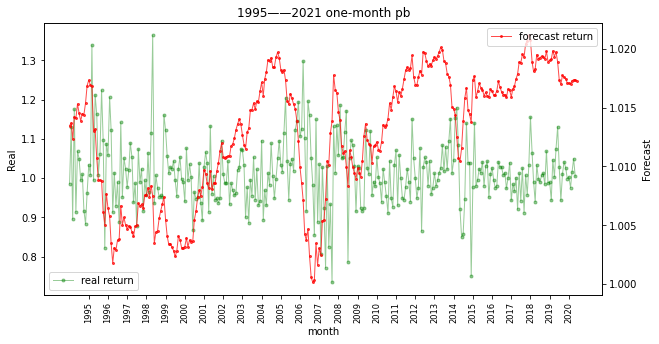

In [22]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(time_series_pb['lreturn'],
         color='green',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='real return')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('Real')  # 设置左边纵坐标标签
ax1.legend(loc=3)  # 设置图例在左下方
ax1.set_title('1995——2021 one-month pb')  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(time_series_pb['freturn'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='forecast return')
ax2.set_ylabel('Forecast')  # 设置右边纵坐标标签
ax2.legend(loc=1)  # 设置图例在右上方

year_freq = pd.date_range(start='1995', end='2021', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

fig = plt.gcf()
fig.savefig('rp.pdf', bbox_inches='tight')

In [23]:
time_series_pe['lreturn'] =1+time_series_pe['Return'].shift(-1)
time_series_pe['freturn']=time_series_pe['pe'] * -0.0087+1.0393
time_series_pe

,year,month,Return,pe,ma_return,lreturn,freturn
mon,,,,,,,
1995-01-01,1995,1,-0.116298,2.763315,3.845414,0.985941,1.015259
1995-02-01,1995,2,-0.014059,2.741896,4.376171,1.130882,1.015446
1995-03-01,1995,3,0.130882,2.844483,4.086114,0.895696,1.014553
1995-04-01,1995,4,-0.104304,2.618815,4.621312,1.175455,1.016516
1995-05-01,1995,5,0.175455,2.762227,4.040376,0.913978,1.015269
...,...,...,...,...,...,...,...
2021-02-01,2021,2,0.003571,2.922587,NaN,0.975981,1.013873
2021-03-01,2021,3,-0.024019,2.873956,NaN,1.014812,1.014297
2021-04-01,2021,4,0.014812,2.787560,NaN,1.049441,1.015048


Text(0.5, 0, 'month')

Text(0, 0.5, 'Real')

Text(0.5, 1.0, '1995——2021 one-month pe')

Text(0, 0.5, 'Forecast')

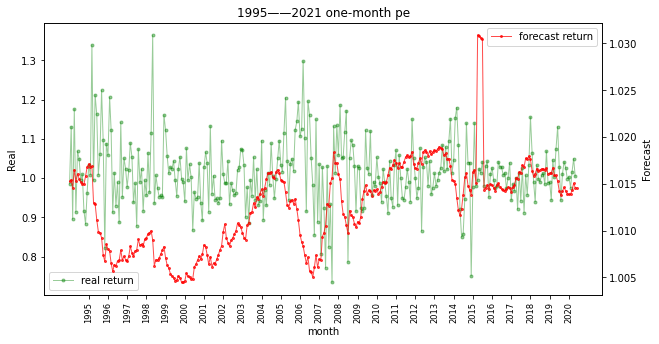

In [24]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(time_series_pe['lreturn'],
         color='green',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='real return')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('Real')  # 设置左边纵坐标标签
ax1.legend(loc=3)  # 设置图例在左下方
ax1.set_title('1995——2021 one-month pe')  # 给整张图命名

ax2 = ax1.twinx()  #twinx()函数表示共享x轴
ax2.plot(time_series_pe['freturn'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='forecast return')
ax2.set_ylabel('Forecast')  # 设置右边纵坐标标签
ax2.legend(loc=1)  # 设置图例在右上方

year_freq = pd.date_range(start='1995', end='2021', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

fig = plt.gcf()
fig.savefig('rp.pdf', bbox_inches='tight')

# 预测一个季度

In [25]:
time_series['pre_return'] = 1
for ti in range(1,4):
    time_series['pre_return'] = time_series['pre_return']*(1+time_series['Return'].shift(-ti))

time_series['qua_freturn']=time_series['pd'] * -0.0402+1.2205
time_series    

,year,month,Return,pd,ma_return,lreturn,freturn,pre_return,qua_freturn
mon,,,,,,,,,
1995-01-01,1995,1,-0.116298,4.084782,3.845414,0.985941,1.016145,0.998686,1.056292
1995-02-01,1995,2,-0.014059,4.081370,4.376171,1.130882,1.016176,1.190650,1.056429
1995-03-01,1995,3,0.130882,4.238190,4.086114,0.895696,1.014780,0.962282,1.050125
1995-04-01,1995,4,-0.104304,4.117053,4.621312,1.175455,1.015858,1.147814,1.054994
1995-05-01,1995,5,0.175455,4.137976,4.040376,0.913978,1.015672,1.025074,1.054153
...,...,...,...,...,...,...,...,...,...
2021-02-01,2021,2,0.003571,4.140173,NaN,0.975981,1.015652,1.039405,1.054065
2021-03-01,2021,3,-0.024019,4.117256,NaN,1.014812,1.015856,1.070321,1.054986
2021-04-01,2021,4,0.014812,4.114410,NaN,1.049441,1.015882,NaN,1.055101


Text(0.5, 0, 'month')

Text(0, 0.5, 'Real')

Text(0.5, 1.0, '1995——2021 one-quarter pd')

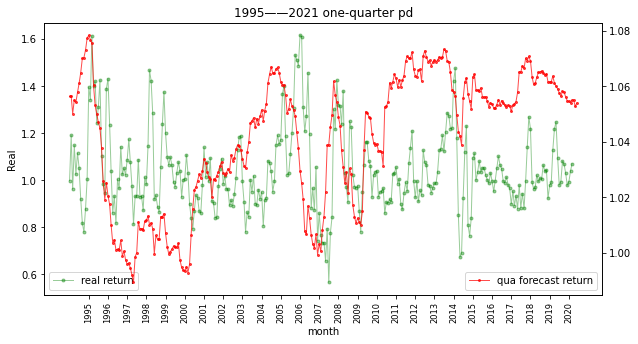

In [26]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(time_series['pre_return'],
         color='green',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='real return')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('Real')  # 设置左边纵坐标标签
ax1.legend(loc=3)  # 设置图例在左下方
ax1.set_title('1995——2021 one-quarter pd')  # 给整张图命名

# ax2 = ax1.twinx()  #twinx()函数表示共享x轴
# ax2.plot(time_series['freturn'],
#          color='blue',
#          marker='o',
#          linestyle='-',
#          linewidth=1,
#          markersize=2,
#          alpha=0.7,
#          label='mon forecast return')
# ax2.set_ylabel('Forecast')  # 设置右边纵坐标标签
# ax2.legend(loc=1)  # 设置图例在右上方

ax3 = ax1.twinx()  #twinx()函数表示共享x轴
ax3.plot(time_series['qua_freturn'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='qua forecast return')
#ax3.set_ylabel('real')  # 设置右边纵坐标标签
ax3.legend(loc=4)  # 设置图例在右上方

year_freq = pd.date_range(start='1995', end='2021', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

fig = plt.gcf()
fig.savefig('rp.pdf', bbox_inches='tight')

In [27]:
time_series_pb['pre_return'] = 1
for ti in range(1,4):
    time_series_pb['pre_return'] = time_series_pb['pre_return']*(1+time_series_pb['Return'].shift(-ti))

time_series_pb['qua_freturn']=time_series_pb['pb'] * -0.0521+1.0871
time_series_pb    

,year,month,Return,pb,ma_return,lreturn,freturn,pre_return,qua_freturn
mon,,,,,,,,,
1995-01-01,1995,1,-0.116298,0.821406,3.845414,0.985941,1.013468,0.998686,1.044305
1995-02-01,1995,2,-0.014059,0.801429,4.376171,1.130882,1.013722,1.190650,1.045346
1995-03-01,1995,3,0.130882,0.912102,4.086114,0.895696,1.012316,0.962282,1.039580
1995-04-01,1995,4,-0.104304,0.761376,4.621312,1.175455,1.014231,1.147814,1.047432
1995-05-01,1995,5,0.175455,0.772707,4.040376,0.913978,1.014087,1.025074,1.046842
...,...,...,...,...,...,...,...,...,...
2021-02-01,2021,2,0.003571,0.542445,NaN,0.975981,1.017011,1.039405,1.058839
2021-03-01,2021,3,-0.024019,0.519381,NaN,1.014812,1.017304,1.070321,1.060040
2021-04-01,2021,4,0.014812,0.513151,NaN,1.049441,1.017383,NaN,1.060365


Text(0.5, 0, 'month')

Text(0, 0.5, 'Real')

Text(0.5, 1.0, '1995——2021 one-quarter pb')

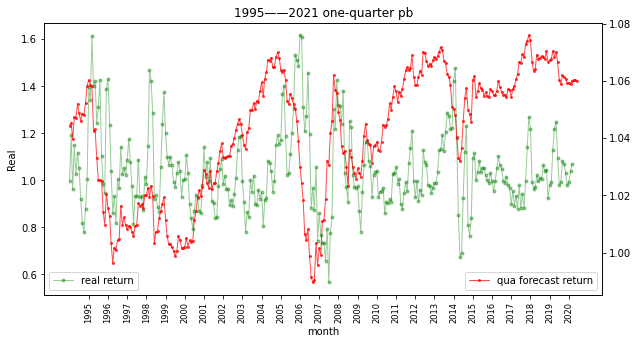

In [28]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(time_series_pb['pre_return'],
         color='green',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='real return')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('Real')  # 设置左边纵坐标标签
ax1.legend(loc=3)  # 设置图例在左下方
ax1.set_title('1995——2021 one-quarter pb')  # 给整张图命名

# ax2 = ax1.twinx()  #twinx()函数表示共享x轴
# ax2.plot(time_series_pb['freturn'],
#          color='blue',
#          marker='o',
#          linestyle='-',
#          linewidth=1,
#          markersize=2,
#          alpha=0.7,
#          label='mon forecast return')
# ax2.set_ylabel('Forecast')  # 设置右边纵坐标标签
# ax2.legend(loc=1)  # 设置图例在右上方

ax3 = ax1.twinx()  #twinx()函数表示共享x轴
ax3.plot(time_series_pb['qua_freturn'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='qua forecast return')
#ax3.set_ylabel('real')  # 设置右边纵坐标标签
ax3.legend(loc=4)  # 设置图例在右上方

year_freq = pd.date_range(start='1995', end='2021', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

fig = plt.gcf()
fig.savefig('rp.pdf', bbox_inches='tight')

In [29]:
time_series_pe['pre_return'] = 1
for ti in range(1,4):
    time_series_pe['pre_return'] = time_series_pe['pre_return']*(1+time_series_pe['Return'].shift(-ti))

time_series_pe['qua_freturn']=time_series_pe['pe'] * -0.0358+1.1503
time_series_pe    

,year,month,Return,pe,ma_return,lreturn,freturn,pre_return,qua_freturn
mon,,,,,,,,,
1995-01-01,1995,1,-0.116298,2.763315,3.845414,0.985941,1.015259,0.998686,1.051373
1995-02-01,1995,2,-0.014059,2.741896,4.376171,1.130882,1.015446,1.190650,1.052140
1995-03-01,1995,3,0.130882,2.844483,4.086114,0.895696,1.014553,0.962282,1.048468
1995-04-01,1995,4,-0.104304,2.618815,4.621312,1.175455,1.016516,1.147814,1.056546
1995-05-01,1995,5,0.175455,2.762227,4.040376,0.913978,1.015269,1.025074,1.051412
...,...,...,...,...,...,...,...,...,...
2021-02-01,2021,2,0.003571,2.922587,NaN,0.975981,1.013873,1.039405,1.045671
2021-03-01,2021,3,-0.024019,2.873956,NaN,1.014812,1.014297,1.070321,1.047412
2021-04-01,2021,4,0.014812,2.787560,NaN,1.049441,1.015048,NaN,1.050505


Text(0.5, 0, 'month')

Text(0, 0.5, 'Real')

Text(0.5, 1.0, '1995——2021 one-quarter pe')

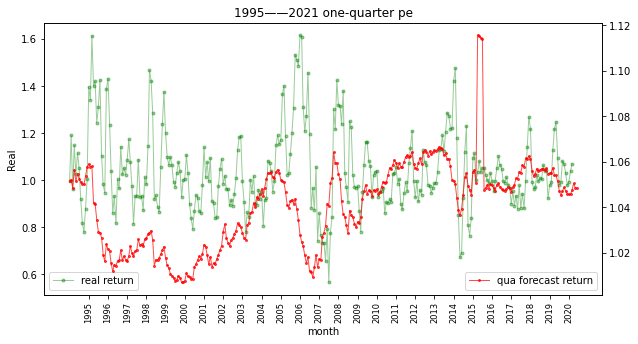

In [30]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(time_series_pe['pre_return'],
         color='green',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='real return')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('Real')  # 设置左边纵坐标标签
ax1.legend(loc=3)  # 设置图例在左下方
ax1.set_title('1995——2021 one-quarter pe')  # 给整张图命名

# ax2 = ax1.twinx()  #twinx()函数表示共享x轴
# ax2.plot(time_series_pe['freturn'],
#          color='blue',
#          marker='o',
#          linestyle='-',
#          linewidth=1,
#          markersize=2,
#          alpha=0.7,
#          label='mon forecast return')
# ax2.set_ylabel('Forecast')  # 设置右边纵坐标标签
# ax2.legend(loc=1)  # 设置图例在右上方

ax3 = ax1.twinx()  #twinx()函数表示共享x轴
ax3.plot(time_series_pe['qua_freturn'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='qua forecast return')
#ax3.set_ylabel('real')  # 设置右边纵坐标标签
ax3.legend(loc=4)  # 设置图例在右上方

year_freq = pd.date_range(start='1995', end='2021', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

fig = plt.gcf()
fig.savefig('rp.pdf', bbox_inches='tight')

# 预测五年

In [31]:
time_series['pre_return'] = 1
for ti in range(1,61):
    time_series['pre_return'] = time_series['pre_return']*(1+time_series['Return'].shift(-ti))

time_series['five_freturn']=time_series['pd'] * -1.0494+6.6519
time_series    

,year,month,Return,pd,ma_return,lreturn,freturn,pre_return,qua_freturn,five_freturn
mon,,,,,,,,,,
1995-01-01,1995,1,-0.116298,4.084782,3.845414,0.985941,1.016145,3.845414,1.056292,2.365330
1995-02-01,1995,2,-0.014059,4.081370,4.376171,1.130882,1.016176,4.376171,1.056429,2.368910
1995-03-01,1995,3,0.130882,4.238190,4.086114,0.895696,1.014780,4.086114,1.050125,2.204343
1995-04-01,1995,4,-0.104304,4.117053,4.621312,1.175455,1.015858,4.621312,1.054994,2.331465
1995-05-01,1995,5,0.175455,4.137976,4.040376,0.913978,1.015672,4.040376,1.054153,2.309508
...,...,...,...,...,...,...,...,...,...,...
2021-02-01,2021,2,0.003571,4.140173,NaN,0.975981,1.015652,NaN,1.054065,2.307202
2021-03-01,2021,3,-0.024019,4.117256,NaN,1.014812,1.015856,NaN,1.054986,2.331251
2021-04-01,2021,4,0.014812,4.114410,NaN,1.049441,1.015882,NaN,1.055101,2.334238


Text(0.5, 0, 'month')

Text(0, 0.5, 'Real')

Text(0.5, 1.0, '1995——2021 five-year pd')

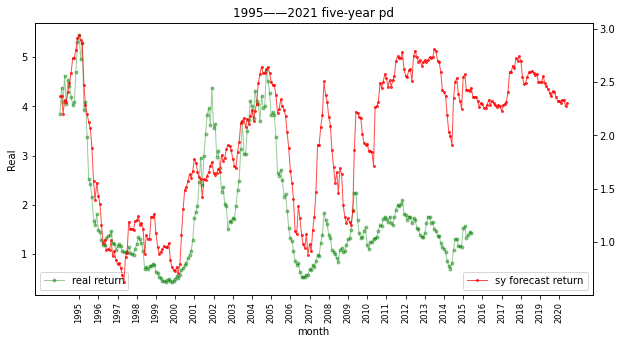

In [32]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(time_series['pre_return'],
         color='green',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='real return')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('Real')  # 设置左边纵坐标标签
ax1.legend(loc=3)  # 设置图例在左下方
ax1.set_title('1995——2021 five-year pd')  # 给整张图命名


ax3 = ax1.twinx()  #twinx()函数表示共享x轴
ax3.plot(time_series['five_freturn'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='sy forecast return')
#ax3.set_ylabel('real')  # 设置右边纵坐标标签
ax3.legend(loc=4)  # 设置图例在右上方

year_freq = pd.date_range(start='1995', end='2021', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

fig = plt.gcf()
fig.savefig('rp.pdf', bbox_inches='tight')

In [33]:
time_series_pb['pre_return'] = 1
for ti in range(1,61):
    time_series_pb['pre_return'] = time_series_pb['pre_return']*(1+time_series_pb['Return'].shift(-ti))

time_series_pb['five_freturn']=time_series_pb['pb'] * -1.5222+3.3502
time_series_pb    

,year,month,Return,pb,ma_return,lreturn,freturn,pre_return,qua_freturn,five_freturn
mon,,,,,,,,,,
1995-01-01,1995,1,-0.116298,0.821406,3.845414,0.985941,1.013468,3.845414,1.044305,2.099855
1995-02-01,1995,2,-0.014059,0.801429,4.376171,1.130882,1.013722,4.376171,1.045346,2.130265
1995-03-01,1995,3,0.130882,0.912102,4.086114,0.895696,1.012316,4.086114,1.039580,1.961799
1995-04-01,1995,4,-0.104304,0.761376,4.621312,1.175455,1.014231,4.621312,1.047432,2.191233
1995-05-01,1995,5,0.175455,0.772707,4.040376,0.913978,1.014087,4.040376,1.046842,2.173985
...,...,...,...,...,...,...,...,...,...,...
2021-02-01,2021,2,0.003571,0.542445,NaN,0.975981,1.017011,NaN,1.058839,2.524490
2021-03-01,2021,3,-0.024019,0.519381,NaN,1.014812,1.017304,NaN,1.060040,2.559598
2021-04-01,2021,4,0.014812,0.513151,NaN,1.049441,1.017383,NaN,1.060365,2.569081


Text(0.5, 0, 'month')

Text(0, 0.5, 'Real')

Text(0.5, 1.0, '1995——2021 five-year pb')

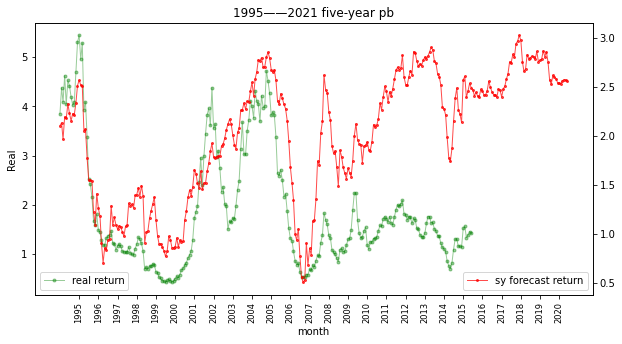

In [34]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(time_series_pb['pre_return'],
         color='green',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='real return')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('Real')  # 设置左边纵坐标标签
ax1.legend(loc=3)  # 设置图例在左下方
ax1.set_title('1995——2021 five-year pb')  # 给整张图命名


ax3 = ax1.twinx()  #twinx()函数表示共享x轴
ax3.plot(time_series_pb['five_freturn'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='sy forecast return')
#ax3.set_ylabel('real')  # 设置右边纵坐标标签
ax3.legend(loc=4)  # 设置图例在右上方

year_freq = pd.date_range(start='1995', end='2021', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

fig = plt.gcf()
fig.savefig('rp.pdf', bbox_inches='tight')

In [35]:
time_series_pe['pre_return'] = 1
for ti in range(1,61):
    time_series_pe['pre_return'] = time_series_pe['pre_return']*(1+time_series_pe['Return'].shift(-ti))

time_series_pe['five_freturn']=time_series_pe['pe'] * -0.7517+4.2192
time_series_pe    

,year,month,Return,pe,ma_return,lreturn,freturn,pre_return,qua_freturn,five_freturn
mon,,,,,,,,,,
1995-01-01,1995,1,-0.116298,2.763315,3.845414,0.985941,1.015259,3.845414,1.051373,2.142016
1995-02-01,1995,2,-0.014059,2.741896,4.376171,1.130882,1.015446,4.376171,1.052140,2.158117
1995-03-01,1995,3,0.130882,2.844483,4.086114,0.895696,1.014553,4.086114,1.048468,2.081002
1995-04-01,1995,4,-0.104304,2.618815,4.621312,1.175455,1.016516,4.621312,1.056546,2.250636
1995-05-01,1995,5,0.175455,2.762227,4.040376,0.913978,1.015269,4.040376,1.051412,2.142834
...,...,...,...,...,...,...,...,...,...,...
2021-02-01,2021,2,0.003571,2.922587,NaN,0.975981,1.013873,NaN,1.045671,2.022292
2021-03-01,2021,3,-0.024019,2.873956,NaN,1.014812,1.014297,NaN,1.047412,2.058847
2021-04-01,2021,4,0.014812,2.787560,NaN,1.049441,1.015048,NaN,1.050505,2.123791


Text(0.5, 0, 'month')

Text(0, 0.5, 'Real')

Text(0.5, 1.0, '1995——2021 five-year pe')

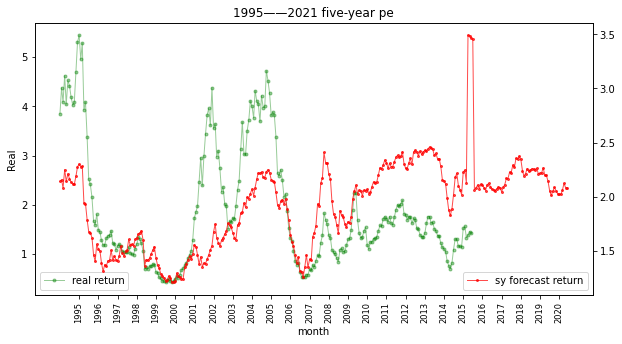

In [36]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 1, 1)  #(x, x, x)这里前两个表示几*几的网格，最后一个表示第几子图

ax1.plot(time_series_pe['pre_return'],
         color='green',
         marker='.',
         linestyle='-',
         linewidth=1,
         markersize=6,
         alpha=0.4,
         label='real return')
ax1.set_xlabel('month')  # 设置横坐标标签
ax1.set_ylabel('Real')  # 设置左边纵坐标标签
ax1.legend(loc=3)  # 设置图例在左下方
ax1.set_title('1995——2021 five-year pe')  # 给整张图命名


ax3 = ax1.twinx()  #twinx()函数表示共享x轴
ax3.plot(time_series_pe['five_freturn'],
         color='red',
         marker='o',
         linestyle='-',
         linewidth=1,
         markersize=2,
         alpha=0.7,
         label='sy forecast return')
#ax3.set_ylabel('real')  # 设置右边纵坐标标签
ax3.legend(loc=4)  # 设置图例在右上方

year_freq = pd.date_range(start='1995', end='2021', freq='y')
ticks = ax1.set_xticks(year_freq)
labels = ax1.set_xticklabels(year_freq.year, rotation=90, fontsize='small')

fig = plt.gcf()
fig.savefig('rp.pdf', bbox_inches='tight')